<a href="https://colab.research.google.com/github/raulbenitez/PIB/blob/main/exercici_parcial_PIB_2021_solucio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Feu servir la funció binary_blobs de les llibreries skimage per generar una imatge binària amb estructures en forma de gotes (fracció de volum de les gotes 0.3, tamany normalitzat de les gotes 0.1, no indiqueu cap llavor de nombres aleatoris). Representeu gràficament la imatge. 

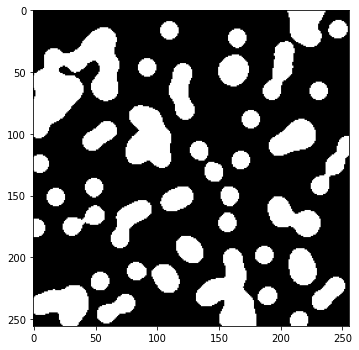

In [20]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt

I = data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.3,seed=2121)

fig = plt.figure(figsize=(5,5))
plt.imshow(I,cmap='gray')
plt.tight_layout()
plt.show()

2. Apliqueu una operació d'erosió morfològica amb un element estructurant amb forma de disc amb radi 3 píxels. Representeu gràficament el resultat. 

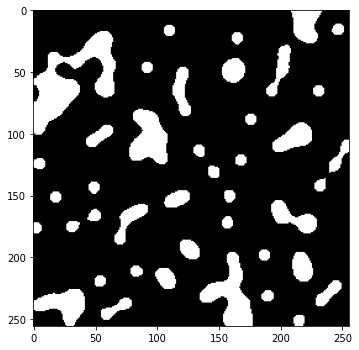

In [21]:
from skimage.morphology import erosion, disk

selem = disk(3)
I1 = erosion(I, selem)

fig = plt.figure(figsize=(5,5))
plt.imshow(I1,cmap='gray')
plt.tight_layout()
plt.show()

3. Etiqueteu les estructures resultants corresponents a les diferents gotes. Representeu gràficament la imatge etiquetada.





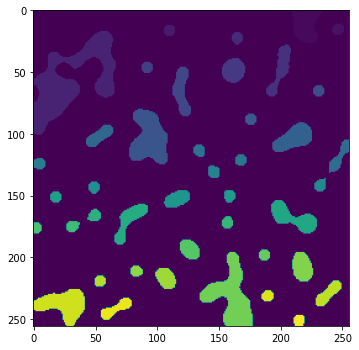

In [22]:
from skimage.measure import label
label_image, nregions = label(I1,return_num=True)

fig = plt.figure(figsize=(5,5))
plt.imshow(label_image)
plt.tight_layout()
plt.show()

In [24]:
import plotly.express as px

fig = px.imshow(label_image)
fig.show()

4. Quantes gotes hi ha i quina és l'àrea en píxels de la gota més gran

In [25]:
from skimage.measure import regionprops
import numpy as np

props = regionprops(label_image)

area = np.zeros(nregions)

for ireg in range(0,nregions):
    area[ireg] = props[ireg].area
    print('Area of region {} is = {} pixels'.format(ireg+1, props[ireg].area))

max_area = np.max(area)
index_gota_gran = np.squeeze(np.where(area==max_area))+1

print('La regio més gran és la etiquetada amb índex {} i té un àrea de {}'.format(index_gota_gran,max_area))

Area of region 1 is = 492 pixels
Area of region 2 is = 74 pixels
Area of region 3 is = 69 pixels
Area of region 4 is = 2326 pixels
Area of region 5 is = 72 pixels
Area of region 6 is = 343 pixels
Area of region 7 is = 298 pixels
Area of region 8 is = 69 pixels
Area of region 9 is = 363 pixels
Area of region 10 is = 69 pixels
Area of region 11 is = 977 pixels
Area of region 12 is = 69 pixels
Area of region 13 is = 476 pixels
Area of region 14 is = 218 pixels
Area of region 15 is = 183 pixels
Area of region 16 is = 76 pixels
Area of region 17 is = 70 pixels
Area of region 18 is = 76 pixels
Area of region 19 is = 80 pixels
Area of region 20 is = 78 pixels
Area of region 21 is = 72 pixels
Area of region 22 is = 218 pixels
Area of region 23 is = 76 pixels
Area of region 24 is = 69 pixels
Area of region 25 is = 480 pixels
Area of region 26 is = 357 pixels
Area of region 27 is = 83 pixels
Area of region 28 is = 74 pixels
Area of region 29 is = 79 pixels
Area of region 30 is = 57 pixels
Area o

5. Entropia de Shannon de la imatge:

In [27]:
from skimage.measure import shannon_entropy

entropy = shannon_entropy(I)
print('Entropy = {} bits'.format(entropy))

Entropy = 0.8812946296443236 bits


In [29]:
NT = I.shape[0]*I.shape[1] # nombre de pixels totals
N1 = I[I==1].sum() # nombre de pixels que valen 1 
N0 = NT-N1 # nombre de pixels que valen 0

p0 = N0/NT # probabilitat  nivell 0
p1 = N1/NT # probabilitat  nivell 1

# Entropia Shannon:
H = -p0*np.log2(p0)-p1*np.log2(p1)
print('Entropy 2 = {} bits'.format(H))

Entropy 2 = 0.8812946296443236 bits
